In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob

In [2]:
import warnings
warnings.filterwarnings("ignore")
import sys
!{sys.executable} -m pip install pandas-profiling


In [3]:
def preprocess(file):  
    data = [ x.replace('\n', ' ').split(' ')[:-1] for x in file.split('name') if '\x00' not in x  ]
    data = [x if len(x)==75 else x[1:] for x in data ] #all 75 attributes besides the name!
    data = [x  for x in data if len(x) ==75] # all rows shall have 75 columns!
    data = [[ a.replace('-9.', '-9') for a in x] for x in data] # -9 are the Non existing values in the dataset.
    #print (data)
    if data[-1] == [''] : 
        data =  data[:-1] # just remove the empty rows in the dataset!
    df = pd.DataFrame([[float (a) for a in x] for x in data])
    return df 
    

def load():
    df = pd.DataFrame()
    for file in glob.glob('*.data'): 
        if 'processed' not in file:
            print (file)
            f = open(file, encoding = 'ISO-8859-1').read()
            data = preprocess(f)
            #print (data)
            df = df.append(data)
    return df
    


In [4]:
df = load()

cleveland.data
switzerland.data
long-beach-va.data


In [5]:
#Get an overview about the dataset!
file = open('heart-disease.names')
f2 = file.read()

In [6]:
df = df = df.loc[:, :67]

df.head()

0    1     2    3    4    5    6    7    8      9   ...   58   59   60  \
0  1.0  0.0  63.0  1.0 -9.0 -9.0 -9.0 -9.0  1.0  145.0  ...  1.0  1.0  1.0   
1  2.0  0.0  67.0  1.0 -9.0 -9.0 -9.0 -9.0  4.0  160.0  ...  1.0  2.0  2.0   
2  3.0  0.0  67.0  1.0 -9.0 -9.0 -9.0 -9.0  4.0  120.0  ...  1.0  1.0  1.0   
3  4.0  0.0  37.0  1.0 -9.0 -9.0 -9.0 -9.0  3.0  130.0  ...  1.0  1.0  1.0   
4  6.0  0.0  41.0  0.0 -9.0 -9.0 -9.0 -9.0  2.0  130.0  ...  1.0  1.0  1.0   

    61   62   63   64   65   66   67  
0 -9.0  1.0 -9.0  1.0 -9.0  1.0  1.0  
1 -9.0  2.0 -9.0  1.0 -9.0  1.0  1.0  
2 -9.0  1.0 -9.0  1.0 -9.0  2.0  2.0  
3 -9.0  1.0 -9.0  1.0 -9.0  1.0  1.0  
4 -9.0  1.0 -9.0  1.0 -9.0  1.0  1.0  

[5 rows x 68 columns]

# We want to predict 'Beta Blocker' property (Beta blocker used during exercise ECG: 1 = yes; 0 = no). The column index is 23

The attributes we take as our data for the model are: 
    - Age (in years) index 2
    - Gender(sex) index 3
    - Cholestrol level serum cholestoral in mg/dl index 11
    - Number of years as a smoker  years index 14

In [7]:
X = pd.DataFrame({'age': df.iloc[:,2], 'Gender': df.iloc[:,3], 'Cholesterol': df.iloc[:,11],
                  'Num_years_smoke': df.iloc[:, 14], 'Beta_blocker': df.iloc[:,23]})
X.head()

age  Gender  Cholesterol  Num_years_smoke  Beta_blocker
0  63.0     1.0        233.0             20.0           0.0
1  67.0     1.0        286.0             40.0           1.0
2  67.0     1.0        229.0             35.0           1.0
3  37.0     1.0        250.0              0.0           1.0
4  41.0     0.0        204.0              0.0           0.0

In [8]:
X.isna().any()

age                False
Gender             False
Cholesterol        False
Num_years_smoke    False
Beta_blocker       False
dtype: bool

In [9]:
import pandas_profiling
X.profile_report()

In [10]:
X = X[X>=0].dropna() # drop NaN values and keep only positive values into account. 

In [11]:
import pandas_profiling
X.profile_report()

## Compare GMM and Kmeans for the heart dataset via the silhouette index and corresponding plots

Wikipedia definition!

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.[1]

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [12]:
X

age  Gender  Cholesterol  Num_years_smoke  Beta_blocker
0    63.0     1.0        233.0             20.0           0.0
1    67.0     1.0        286.0             40.0           1.0
2    67.0     1.0        229.0             35.0           1.0
3    37.0     1.0        250.0              0.0           1.0
4    41.0     0.0        204.0              0.0           0.0
..    ...     ...          ...              ...           ...
193  62.0     1.0        170.0             20.0          22.0
194  46.0     1.0        310.0             21.0           0.0
195  54.0     0.0        333.0              0.0           1.0
197  55.0     1.0        223.0             40.0           1.0
199  62.0     1.0        254.0              0.0           1.0

[404 rows x 5 columns]

In [13]:
X = X[X['Cholesterol']>0] # since we only want to take cholesterol values >0 in to account

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(X)  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
X[['pc1', 'pc2']] = pd.DataFrame(pca.fit_transform(X))

In [17]:
X

age  Gender  Cholesterol  Num_years_smoke  Beta_blocker         pc1  \
0    63.0     1.0        233.0             20.0           0.0  -13.336945   
1    67.0     1.0        286.0             40.0           1.0   39.497921   
2    67.0     1.0        229.0             35.0           1.0  -17.423494   
3    37.0     1.0        250.0              0.0           1.0    3.292724   
4    41.0     0.0        204.0              0.0           0.0  -42.595483   
..    ...     ...          ...              ...           ...         ...   
193  62.0     1.0        170.0             20.0          22.0   -2.804404   
194  46.0     1.0        310.0             21.0           0.0   26.436461   
195  54.0     0.0        333.0              0.0           1.0    7.180354   
197  55.0     1.0        223.0             40.0           1.0 -120.201952   
199  62.0     1.0        254.0              0.0           1.0  -35.792662   

           pc2  
0     3.357135  
1    24.142976  
2    18.597356  
3   -18.579041  
4   -18.705323  
..         ...  
193  16.321204  
194  13.381104  
195  17.416487  
197 -18.130962  
199   1.465656  

[370 rows x 7 columns]

In [18]:
import silhouette as si

In [19]:
si

<module 'silhouette' from '/Users/shreyakapoor/Life_Science_Informatics/WiSe19/MLinLSI/silhouette.py'>

For n_clusters = 2 The average silhouette_score is : 0.4746306637480278
For n_clusters = 3 The average silhouette_score is : 0.4189044952210279
For n_clusters = 4 The average silhouette_score is : 0.4228157912679556
For n_clusters = 5 The average silhouette_score is : 0.36253292350100513
For n_clusters = 6 The average silhouette_score is : 0.347168769241494


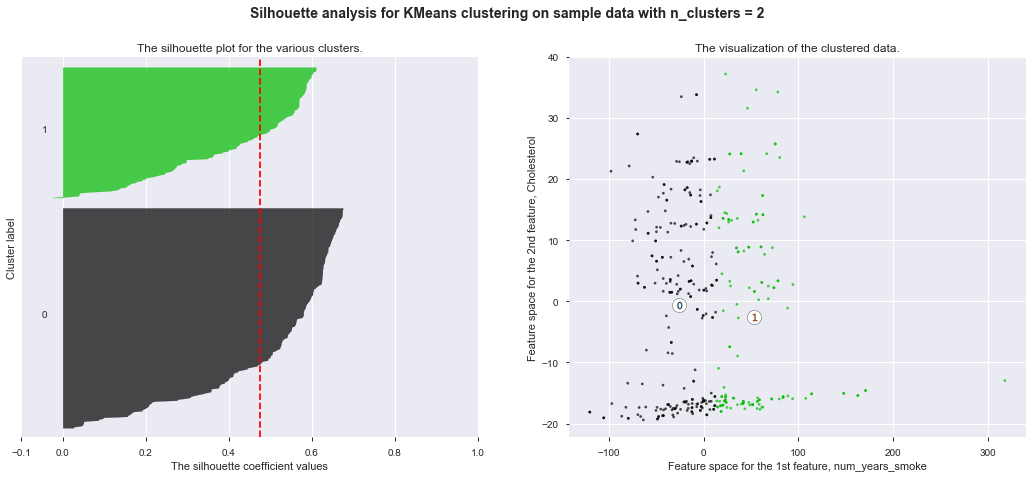

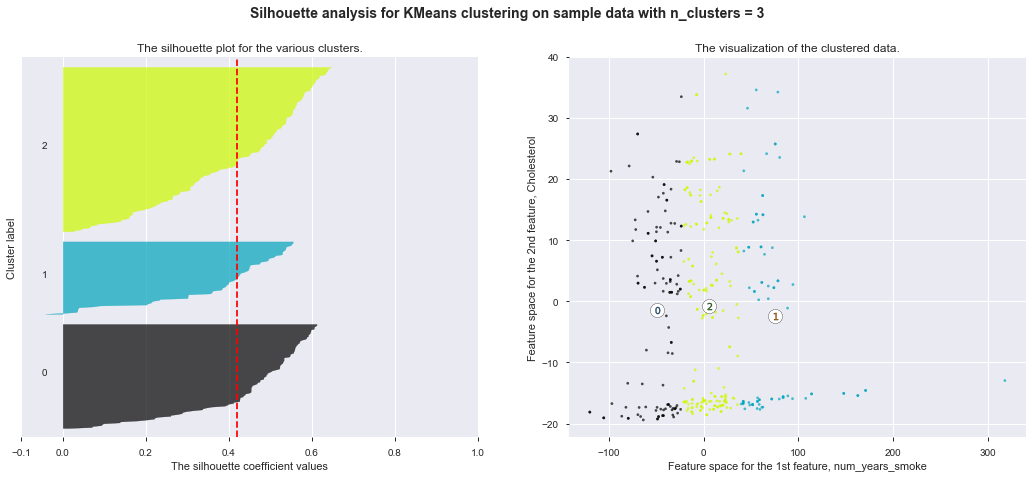

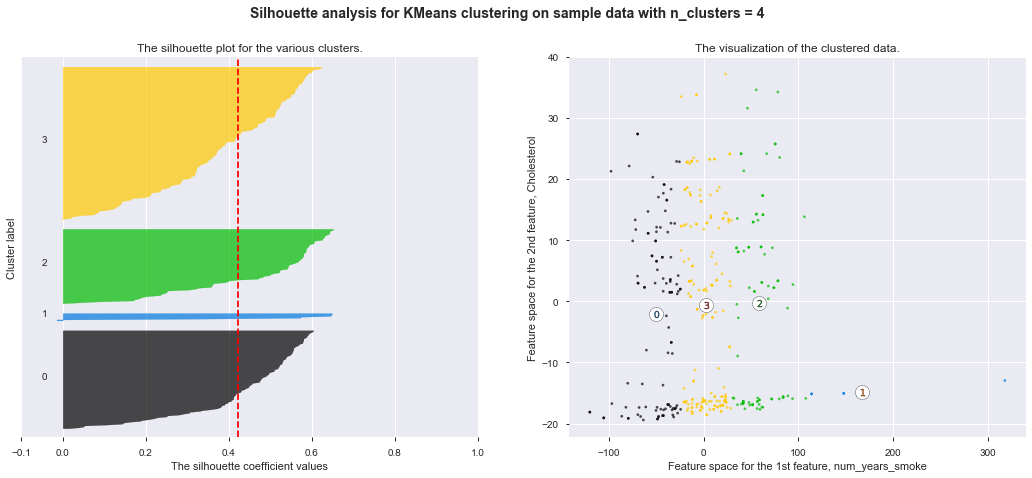

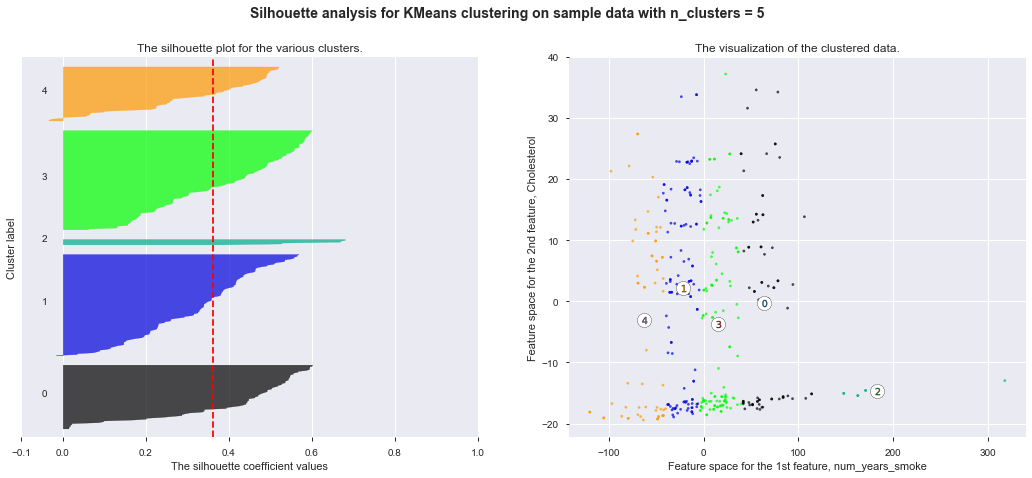

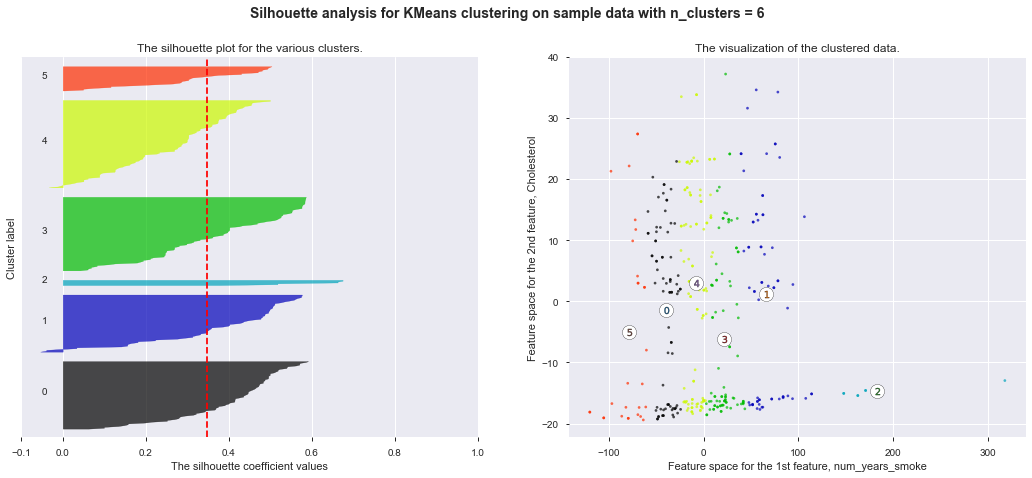

In [20]:
si.silhouette_method('k-means', X, 'pc1', 'pc2')

For n_clusters = 2 The average silhouette_score is : 0.1530151199118994
For n_clusters = 3 The average silhouette_score is : 0.15729098429189328
For n_clusters = 4 The average silhouette_score is : 0.13150745642965433
For n_clusters = 5 The average silhouette_score is : 0.026397503998478122
For n_clusters = 6 The average silhouette_score is : 0.1873507524584749


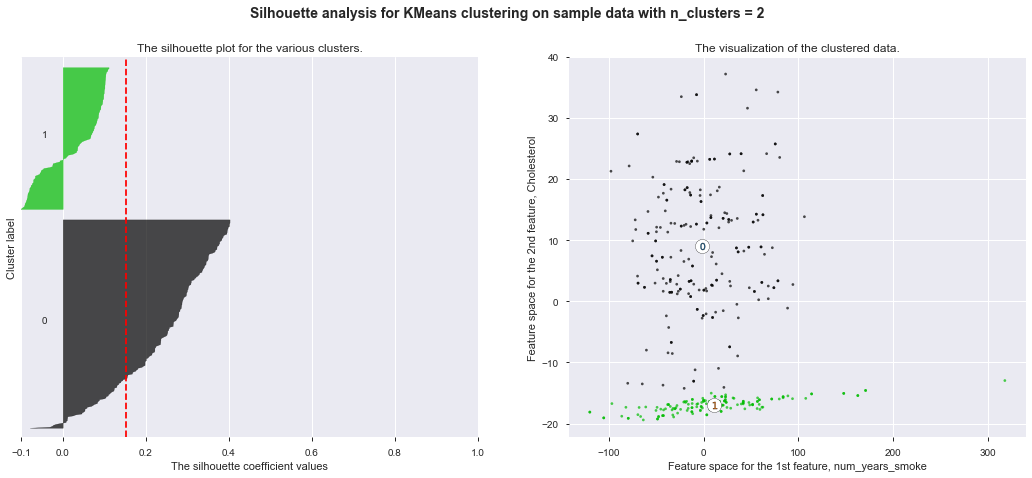

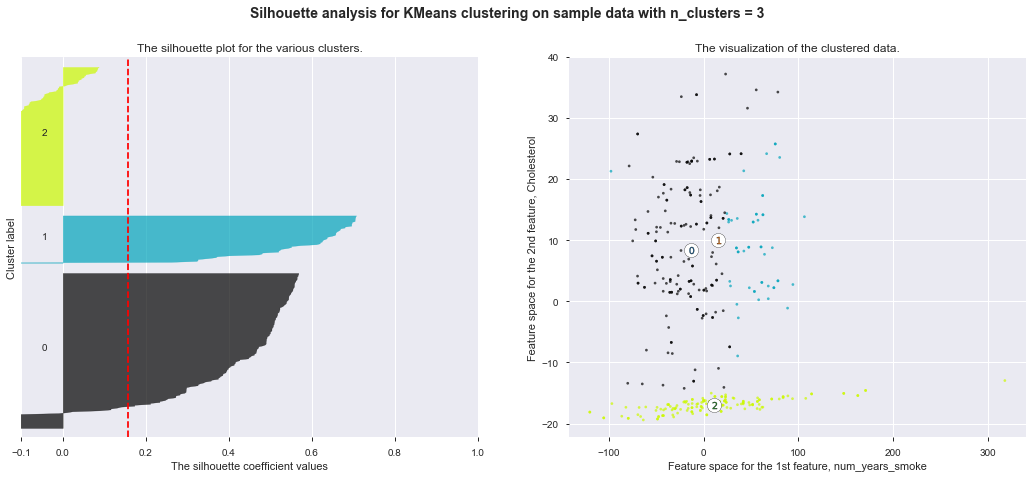

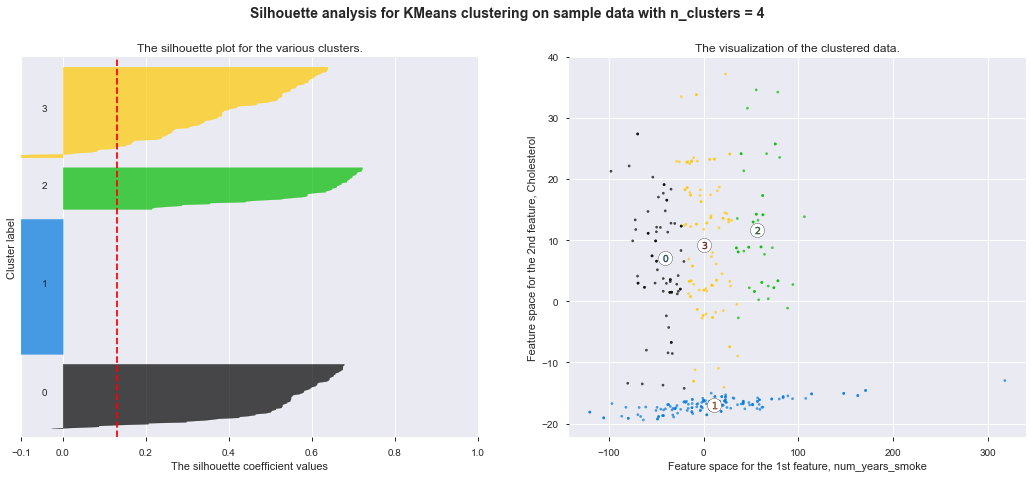

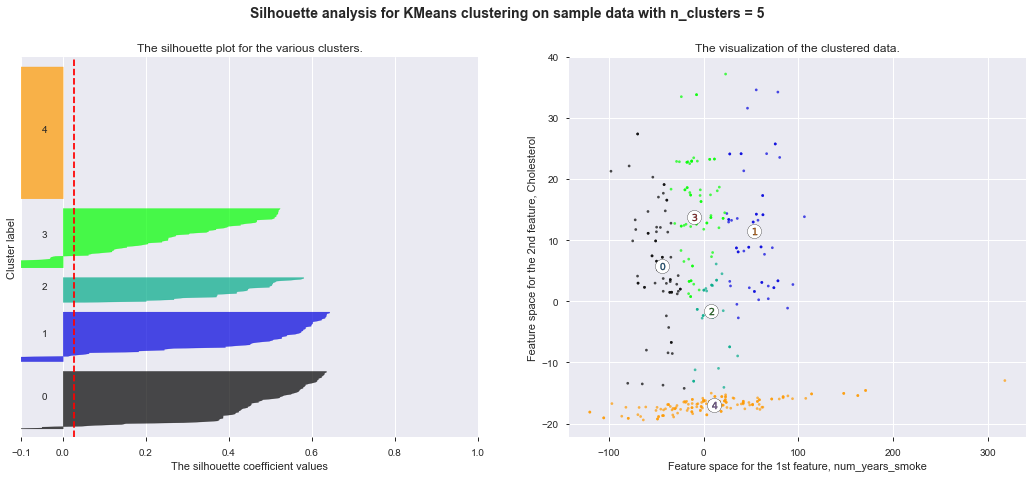

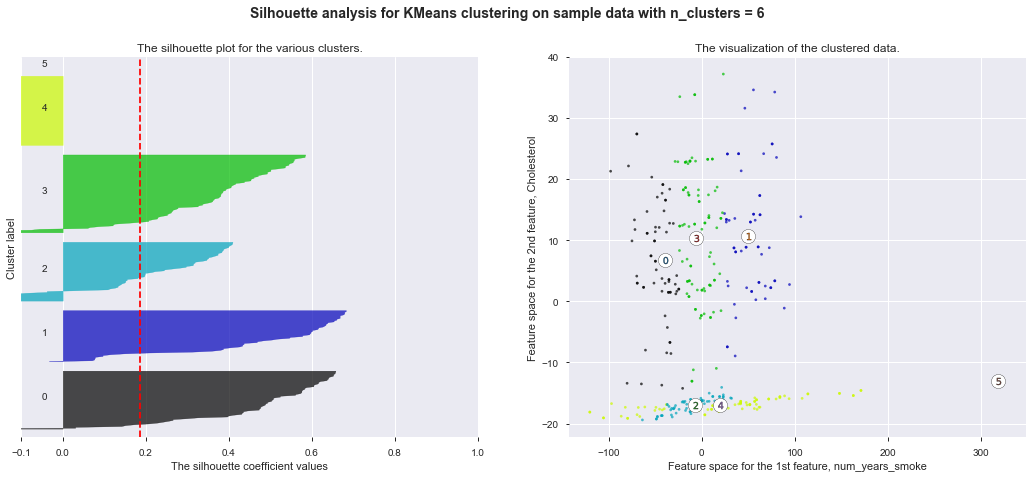

In [21]:
si.silhouette_method('GMM', X, 'pc1', 'pc2')

The trend for the silhoutte index is similar for both KNN and GMM in this particular case of age and cholesterol!